In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
file_path = 'books.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0


In [19]:
#columns of the dataframe
df.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url', 'NonEnglish'],
      dtype='object')

In [20]:
df.describe

<bound method NDFrame.describe of      book_id  goodreads_book_id  best_book_id   work_id  books_count  \
0         15              48855         48855   3532896          710   
1         40              19501         19501   3352398          185   
2         81               7445          7445   2944133           92   
3         82               1845          1845   3284484          108   
4         87               1617          1617    265616          109   
..       ...                ...           ...       ...          ...   
394     9788           23399022      23399022  42955411           21   
395     9847           20685373      20685373  40000267           18   
396     9887             503248        503248    491309           21   
397     9960             127970        127970   1066433           26   
398     9968             554674        554674    548132           34   

           isbn        isbn13  \
0     553296981  9.780553e+12   
1     143038419  9.780143e+12   
2 

# Question 1-
How many rows and columns are there in books.csv dataset?

In [21]:
rows, columns = df.shape

# Print the results
print(f'The book.csv  has {rows} rows and {columns} columns.')

The book.csv  has 399 rows and 24 columns.


# Question 2-
How many books do not have an original title?

In [22]:
null_count = df["original_title"].isnull().sum()
print(null_count)

36


# Question 3-
How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

In [23]:
#first droping the null values
df.dropna(subset=["original_title"], inplace=True)
null_count = df["original_title"].isnull().sum()
print(null_count)

0


In [24]:
#now the uniques books
unique_values = df["book_id"].nunique()
unique_values

363

# Question 4-
What is the average rating of all the books in the dataset based on ‘average_rating’?

In [25]:
average_rating = df["average_rating"].mean()
average_rating

3.987079889807162

# Question 5-
Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

In [26]:
books_published_in_2000 = df[df["original_publication_year"] == 2000]

# Get the count of books published in 2000
num_books_published_in_2000 = books_published_in_2000.shape[0]
num_books_published_in_2000

7

# Question 6-
Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

In [27]:
# Find the index of the row with the maximum value in work_ratings_count
max_index = df['work_ratings_count'].idxmax()

# Get the title of the book instead of the whole row with the maximum value
row_with_max_value = df["title"].loc[max_index]

print(row_with_max_value)

The Diary of a Young Girl


# Question 7-
Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

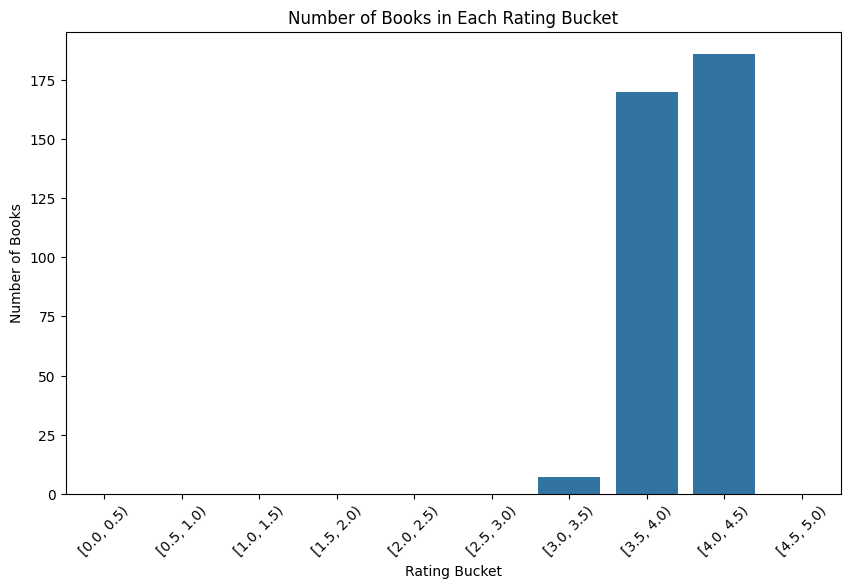

In [28]:
import seaborn as sns

# Define the bins
bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# Bucket the 'average_rating' column
df['rating_bucket'] = pd.cut(df['average_rating'], bins, right=False, include_lowest=True)

# Count the number of books in each bucket
bucket_counts = df['rating_bucket'].value_counts().sort_index()

# Use Seaborn for styling
plt.figure(figsize=(10, 6))
sns.barplot(x=bucket_counts.index.astype(str), y=bucket_counts)
plt.xlabel('Rating Bucket')
plt.ylabel('Number of Books')
plt.title('Number of Books in Each Rating Bucket')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()